# 분산분석

## 일원분산분석(One-way ANOVA)
일원분산분석은 반응값에 영향을 미치는 실험요인이 하나인 경우에  
실험 요인의 각 수준간에 평균 차이가 있는지를 분석하는 방법입니다.

### 문제
이 데이터는 목화 함유량(pct)에 따라 변하는 섬유 장력(tensile)을 측정한 자료입니다.  
이 떄 분산분석을 통해 목화 함유량에 따라 섬유 장력의 평균에 차이가 있는지,  
각 함유량 간에도 장력의 유의한 차이가 있는지 확인할 수 있습니다.

In [4]:
import pandas as pd

In [15]:
pct = [15,15,15,15,15,
         20,20,20,20,20,
         25,25,25,25,25,
         30,30,30,30,30,
         35,35,35,35,35,]
tensile = [7,7,15,11,9,
           12,17,12,18,18,
          14,18,18,19,19,
          19,25,22,19,23,
          7,10,11,15,11,]

In [16]:
cotton_df = pd.DataFrame(zip(pct, tensile), columns=["pct", "tensile"])
cotton_df.head()

,pct,tensile
0,15,7
1,15,7
2,15,15
3,15,11
4,15,9


파이썬에서 분산분석은 먼저 statsmodels 모듈의 ols 함수를 이용해  
회귀식을 적합한다음 anova_lm() 함수로 구할 수 있습니다.

In [17]:
import statsmodels.formula.api as sm

model = sm.ols(formula = "tensile ~ C(pct)", data=cotton_df).fit()

In [18]:
from statsmodels.stats.anova import anova_lm

print(anova_lm(model))

            df  sum_sq  mean_sq          F    PR(>F)
C(pct)     4.0  475.76   118.94  14.756824  0.000009
Residual  20.0  161.20     8.06        NaN       NaN


p-value가 0.000009로 메우 작으므로 섬유 장력의 평균이 목화 함유량에 따라  
유의한 차이가 있다고 해석할 수 있습니다.

목화 함유량 각 수준의 차이는 Tukey의 다중비교를 통해 확인할 수 있습니다.  
함수는 statsmodels의 MultiComparison을 사용합니다.

In [21]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(cotton_df["tensile"], cotton_df["pct"])
mc_tukey = mc.tukeyhsd()

print(mc_tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    15     20      5.6 0.0385   0.2266 10.9734   True
    15     25      7.8 0.0026   2.4266 13.1734   True
    15     30     11.8  0.001   6.4266 17.1734   True
    15     35      1.0    0.9  -4.3734  6.3734  False
    20     25      2.2 0.7148  -3.1734  7.5734  False
    20     30      6.2 0.0189   0.8266 11.5734   True
    20     35     -4.6 0.1165  -9.9734  0.7734  False
    25     30      4.0 0.2102  -1.3734  9.3734  False
    25     35     -6.8 0.0091 -12.1734 -1.4266   True
    30     35    -10.8  0.001 -16.1734 -5.4266   True
-----------------------------------------------------


- meansdiff : 각 수준 간의 평균 차이값
- p-adj : 평균 차이에 대한 유의확률 p값
- lower, upper : 평균 차이의 95% 신뢰구간

주요하게 확인할 것은 p-adj로 이 값이 0.05보다 작으면  
수준 간의 평균 차이가 없다는 귀무가설이 기각됩니다.  
따라서 15-20, 15-25, 15-30 등 평균에 유의한 차이가 있지만  
15-35, 20-225 간에는 평균의 유의한 차이가 없음을 알 수 있습니다.

## 이원분산분석(Two-way ANOVA)
이원분산분석은 반응값에 영향을 미치는 실험요인이 2개인 경우의 분산분석 방법입니다.  
아래의 데이터는 제조시 온도(temp)와 판유리 종류(glass) 별로  
유리 강도(str)에 차이가 있는지를 3번 반복 측정한 데이터입니다.

In [36]:
glass = [x for x in range(1,4) for _ in range(9)]
temp = [100,100,100,
       125,125,125,
       150,150,150]*3
strength = [580,568,570,
           1090,1087,1085,
           1392,1380,1386,
           550,530,579,
           1070,1035,1000,
           1328,1312,1299,
           546,575,599,
           1045,1053,1066,
           867,904,889]

In [37]:
glass_df = pd.DataFrame(zip(glass, temp, strength), columns=["glass", "temp", "strength"])
glass_df.head()

,glass,temp,strength
0,1,100,580
1,1,100,568
2,1,100,570
3,1,125,1090
4,1,125,1087


In [38]:
import statsmodels.formula.api as sm

model = sm.ols(formula = "strength ~ C(glass)*C(temp)", data=glass_df).fit()

In [39]:
from statsmodels.stats.anova import anova_lm

print(anova_lm(model))

                    df        sum_sq        mean_sq            F        PR(>F)
C(glass)           2.0  1.508645e+05   75432.259259   206.370554  3.886026e-13
C(temp)            2.0  1.970335e+06  985167.259259  2695.259499  5.008957e-23
C(glass):C(temp)   4.0  2.905517e+05   72637.925926   198.725707  1.254188e-14
Residual          18.0  6.579333e+03     365.518519          NaN           NaN


이원분산분석 결과가 출력되고  
세 인자의 p-value값이 모두 0에 매우 가까워  
유리 강도는 유리 종류와 온도에 유의한 차이가 생기고,  
유리의 종류와 온도의 상호작용 효과도 유의하다는 것을 알 수 있습니다.  
이 상호작용 효과를 확인하기 위해 그래프를 그려주면 다음과 같습니다.

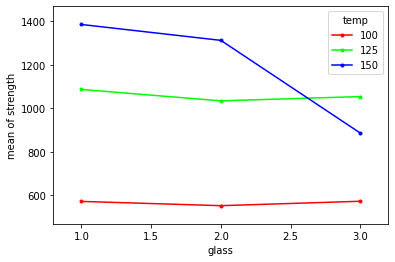

In [40]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(glass_df["glass"], glass_df["temp"], glass_df["strength"])

이를 통해 판유리의 종류가 2에서 3으로 변하면 
150도에서의 유리 강도의 효과가 바뀌는 상호작용을 확인할 수 있습니다.